<a href="https://colab.research.google.com/github/Rogiervanweert/CoronaWatchNL/blob/master/CovidWorld_Plot_Log_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
urldeath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [0]:
def read_data(url):
    
    # Read and preprocess data file
    df = pd.read_csv(url)

    df = df.drop(columns=['Lat','Long'])
    df = df.fillna('')
    df ['Land'] = df['Country/Region'] + str(",") + df['Province/State']
    df = df.set_index('Land')
    df.index.name = None
    df = df.drop(columns=['Province/State','Country/Region'])
    df = df.transpose()
    df.index.name = 'Datum'
    df.reset_index(inplace=True)
    
    return (df)  


In [0]:
def read_country(df,country):

    df1 =  df.loc[:,['Datum', country]]
    df1 = df1.rename(columns={country:'Aantal'})

    df1['New_cases']=df1.Aantal.diff()
    
    df1['Growth_factor'] = df1['New_cases'] / df1['New_cases'].shift(1) 
    
    df1['Total_EMA'] = pd.Series.ewm(df1['Aantal'], span=RolAVG).mean()
    df1['New_EMA'] = pd.Series.ewm(df1['New_cases'], span=RolAVG).mean()
    df1['Gf_EMA'] = pd.Series.ewm(df1['Growth_factor'], span=RolAVG).mean()
    
    return (df1)  


In [0]:
def add_variables(df):


    # New cases
    df['New_cases'] = df.Aantal.diff()

    # Groeifactor
    df['Growth_factor'] = df['New_cases'] / df['New_cases'].shift(1)  
      

    #EWM
    df['Total_EMA'] = pd.Series.ewm(df['Aantal'], span=RolAVG).mean()
    df['New_EMA'] = pd.Series.ewm(df['New_cases'], span=RolAVG).mean()
    
    return(df)


In [0]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]+str("= ")+str(int(df['New_cases'][df.index[-1]]))+str("/Dif:")+str(int(df['New_cases'][df.index[-1]])-int(df['New_cases'][df.index[-2]]))+str("/")+str(df['Aantal'][df.index[-1]])
    return name

In [0]:
def create_logarithmic_growth_plot(df2,df3,df4,df5,df6):
    # Setup Object Oriented plot because we re-use this function
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set(xscale="log", yscale="log" )
    ax.set_xlabel("Totaal cases", fontsize=15)
    ax.set_ylabel("Nieuwe cases", fontsize=15)
    #ax.set_xlim(0, 100000)
    #ax.set_ylim(0, 5000)

    ax.grid(which='major', linewidth=1)
    ax.grid(which='minor', linewidth=0.1)

    ax.plot(df2['Total_EMA'], df2["New_EMA"],label = get_df_name(df2))
    ax.plot(df3['Total_EMA'], df3["New_EMA"],label = get_df_name(df3))
    ax.plot(df4['Total_EMA'], df4["New_EMA"],label = get_df_name(df4))
    ax.plot(df5['Total_EMA'], df5["New_EMA"],label = get_df_name(df5))
    ax.plot(df6['Total_EMA'], df6["New_EMA"],label = get_df_name(df6))
  
    ax.legend()     
  
    return fig,ax


In [0]:
def plot_logarithmic_growth_daily(df2,df3,df4,df5,df6):
    fig, ax = create_logarithmic_growth_plot(df2,df3,df4,df5,df6)
    ax.set(title="Nieuwe cases tegen totaal cases (14 daags gemiddelde)")

    fig.savefig("exponential_growth_daily.png")

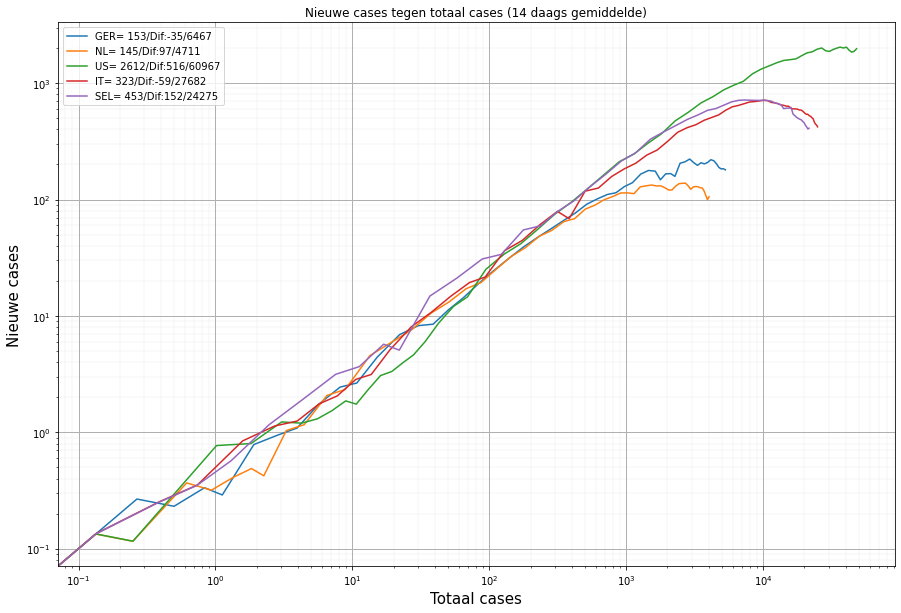

In [45]:
if __name__ == "__main__":
    #rolling avg
    RolAVG = 14

    fatalities = read_data(urldeath)
    NL = read_country(fatalities,'Netherlands,')
    GER = read_country(fatalities,'Germany,')
    US = read_country(fatalities,'US,')
    IT = read_country(fatalities,'Italy,')
    SEL = read_country(fatalities,'Spain,')
    plot_logarithmic_growth_daily(GER,NL,US,IT,SEL)
 

In [46]:
SEL.head(150)


,Datum,Aantal,New_cases,Growth_factor,Total_EMA,New_EMA,Gf_EMA
0,1/22/20,0,NaN,NaN,0.000000,NaN,NaN
1,1/23/20,0,0.0,NaN,0.000000,0.000000,NaN
2,1/24/20,0,0.0,NaN,0.000000,0.000000,NaN
3,1/25/20,0,0.0,NaN,0.000000,0.000000,NaN
4,1/26/20,0,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...
94,4/25/20,22902,378.0,1.029973,19942.642347,455.290275,1.503429
95,4/26/20,23190,288.0,0.761905,20375.623835,432.984877,1.404516
96,4/27/20,23521,331.0,1.149306,20795.007717,419.386879,1.370475
97,4/28/20,23822,301.0,0.909366,21198.607015,403.601947,1.308973
